In [1]:
# loading Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Taking a cleaned dataset
df = pd.read_csv('Titanic_Final.csv')

In [3]:
df.sample(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
67,0,3,male,0,0,8.1583,S
811,0,3,male,0,0,24.1500,S


In [4]:
# creating dummies
X = pd.get_dummies(df)

#### Applying Algorithm

In [6]:
model = MeanShift()
model.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [7]:
labels = model.labels_
center = model.cluster_centers_

In [8]:
# creating a null coloumn
df['Cluster'] = np.nan

In [9]:
for i in range(len(X)):
    df['Cluster'].iloc[i] = labels[i]

C:\Users\koush\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df.sample(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cluster
849,1,1,female,1,0,89.1042,C,1.0
174,0,1,male,0,0,30.6958,C,0.0
410,0,3,male,0,0,7.8958,S,0.0


### Visulation of Data

In [11]:
cluster=df.groupby(by='Cluster')

In [12]:
cluster['Survived'].aggregate(['count'])

,count
Cluster,
0.0,706
1.0,130
2.0,17
3.0,18
4.0,9
5.0,8
6.0,3


### Visulation

##### Survived vs Cluster

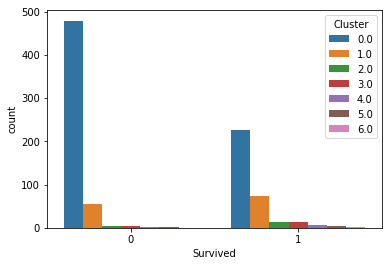

In [13]:
sns.countplot(data=df,x='Survived',hue='Cluster')

##### Pclass vs Cluster

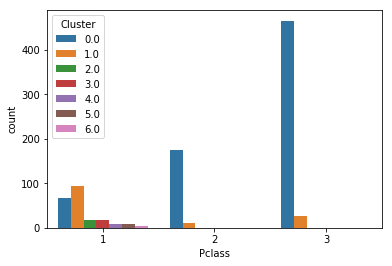

In [14]:
sns.countplot(data=df,x='Pclass',hue='Cluster')

##### Fare vs Cluster

C:\Users\koush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


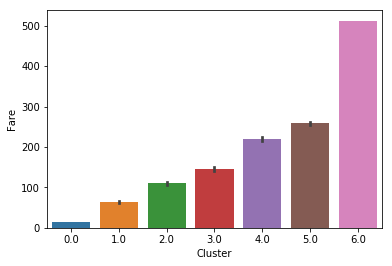

In [15]:
sns.barplot(data=df,x='Cluster',y='Fare')

In [107]:
a1 = np.array(df.loc[df['Survived'] == 1,['Survived','Cluster']].groupby(by = ['Cluster']).count()['Survived'])

In [118]:
b1 = np.array(df.loc[df['Survived'] == 0,['Survived','Cluster']].groupby(by = ['Cluster']).count()['Survived'])

In [119]:
b1 = np.append(b1,0)

In [121]:
d = a1 + b1

#### Percentage of Survival in each Cluster

In [128]:
z = ((a1/d)*100)

<BarContainer object of 7 artists>

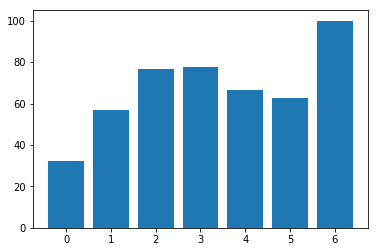

In [133]:
plt.bar(x=[0,1,2,3,4,5,6],height=z)

In [28]:
a = df.loc[df['Survived'] == 1,['Survived','Cluster']].groupby(by = ['Cluster']).count()

In [109]:
a

Cluster
0.0    227
1.0     74
2.0     13
3.0     14
4.0      6
5.0      5
6.0      3
Name: Survived, dtype: int64

In [110]:
b =df.loc[df['Survived'] == 0,['Survived','Cluster']].groupby(by = ['Cluster']).count()

In [111]:
b

,Survived
Cluster,
0.0,479
1.0,56
2.0,4
3.0,4
4.0,3
5.0,3


#### Pie Chart for number of Survivals at different clusters

([<matplotlib.patches.Wedge at 0x14271826518>,
 [Text(-0.5412261053491088, 0.9576399651688706, ''),
  Text(0.15108903331374773, -1.0895742765008347, ''),
  Text(0.8863414366131371, -0.6514590223049801, ''),
  Text(1.0191434327881919, -0.41394041045143265, ''),
  Text(1.077614015776348, -0.22078956724078433, ''),
  Text(1.0943891775802783, -0.11096093003919211, ''),
  Text(1.0995823424332134, -0.030309605888030958, '')],
 [Text(-0.295214239281332, 0.522349071910293, '66.37%'),
  Text(0.08241219998931694, -0.5943132417277279, '21.64%'),
  Text(0.4834589654253475, -0.35534128489362543, '3.80%'),
  Text(0.5558964178844682, -0.22578567842805414, '4.09%'),
  Text(0.5877894631507352, -0.12043067304042779, '1.75%'),
  Text(0.5969395514074244, -0.06052414365774114, '1.46%'),
  Text(0.5997721867817527, -0.01653251230256234, '0.88%')])

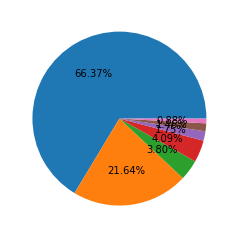

In [70]:
plt.pie(a.values,autopct="%.2f%%")

#### Pie Chart for number of Deaths at different clusters

([<matplotlib.patches.Wedge at 0x14271886438>,
 [Text(-1.0129239620841766, 0.4289347817975292, ''),
  Text(0.9753486307463245, -0.50862073148985, ''),
  Text(1.0896424918350571, -0.15059628145305518, ''),
  Text(1.0953926145523065, -0.10057345566431758, ''),
  Text(1.098541522636468, -0.05662616924665375, ''),
  Text(1.0998379083138718, -0.018883205124325234, '')],
 [Text(-0.5525039793186417, 0.2339644264350159, '87.25%'),
  Text(0.5320083440434497, -0.2774294899035545, '10.20%'),
  Text(0.5943504500918493, -0.082143426247121, '0.73%'),
  Text(0.5974868806648944, -0.054858248544173226, '0.73%'),
  Text(0.5992044668926189, -0.030887001407265677, '0.55%'),
  Text(0.5999115863530209, -0.010299930067813762, '0.55%')])

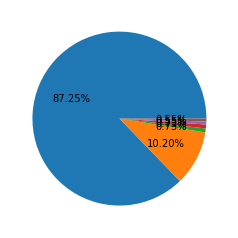

In [71]:
plt.pie(b.values,autopct="%.2f%%")

## Conclusion

##### The data is divided into 5 classes
##### where class 0 contains more people in Pclass 3
##### Mean Fare increased while increasing cluster number